<a href="https://colab.research.google.com/github/tsaniarisqi/Machine_Learning_2022/blob/main/UAS/Copy_of_Fake_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset yang digunakan memiliki 5 kolom, yang terdiri dari id, author, tittle, text, label

In [3]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load Data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Baca data
df = pd.read_csv('/content/drive/MyDrive/dataset/uas/fake-news/train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
# pemahaman terhadap data
# ukuran data
df.shape

# info data
df.info()

# deskripsi data
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


# Data Cleaning

In [7]:
## Get the Independent Features
X=df.drop('label',axis=1)

In [8]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [9]:
## Get the Dependent features
y=df['label']

In [10]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [11]:
# cek apakah dalam dataset terdapat nilai yang kosong
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [12]:
# hapus semua data yang memiliki nilai yang kosong
df=df.dropna()

In [13]:
# cek kembali apakah dalam dataset terdapat nilai yang kosong
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [14]:
# pemahaman terhadap data
# ukuran data
df.shape

# info data
df.info()

# deskripsi data
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18285 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      18285 non-null  int64 
 1   title   18285 non-null  object
 2   author  18285 non-null  object
 3   text    18285 non-null  object
 4   label   18285 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 857.1+ KB


,id,label
count,18285.000000,18285.000000
mean,10409.807383,0.433361
std,5998.216236,0.495553
min,0.000000,0.000000
25%,5217.000000,0.000000
50%,10422.000000,0.000000
75%,15603.000000,1.000000
max,20799.000000,1.000000


In [15]:
messages=df.copy()

In [16]:
messages.reset_index(inplace=True)
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [118]:
import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus=[]
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [119]:
corpus2 = ['hous dem aid even see comey letter jason chaffetz tweet',
          'flynn hillari clinton big woman campu breitbart',
          'truth might get fire',
          'civilian kill singl us airstrik identifi',
          'iranian woman jail fiction unpublish stori woman stone death adulteri']

In [120]:
messages.shape

(18285, 6)

In [121]:
y=messages['label']

# TFidf Vectorizer

In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(smooth_idf=True, norm=None, max_df=1.0, min_df=1)
X=vectorizer.fit_transform(corpus2)
print(vectorizer.get_feature_names())
y=messages['label'].head()

['adulteri', 'aid', 'airstrik', 'big', 'breitbart', 'campu', 'chaffetz', 'civilian', 'clinton', 'comey', 'death', 'dem', 'even', 'fiction', 'fire', 'flynn', 'get', 'hillari', 'hous', 'identifi', 'iranian', 'jail', 'jason', 'kill', 'letter', 'might', 'see', 'singl', 'stone', 'stori', 'truth', 'tweet', 'unpublish', 'us', 'woman']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [129]:
feature_names = vectorizer.get_feature_names()

In [130]:
def tf_idf(text):
  tfidf_metrix = vectorizer.transform([text]).todense()
  feature_index = X[0,:].nonzero()[1]
  skor= zip([feature_names[i] for i in feature_index], [X[0,x] for x in feature_index])
  return dict(skor)

In [131]:
text='hous dem aid even see comey letter jason chaffetz tweet'
tf_idf(text)

{'tweet': 2.09861228866811,
 'chaffetz': 2.09861228866811,
 'jason': 2.09861228866811,
 'letter': 2.09861228866811,
 'comey': 2.09861228866811,
 'see': 2.09861228866811,
 'even': 2.09861228866811,
 'aid': 2.09861228866811,
 'dem': 2.09861228866811,
 'hous': 2.09861228866811}

In [134]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

count_df = pd.DataFrame(X_train, columns=vectorizer.get_feature_names())
count_df.head()

ValueError: ignored

accuracy:   0.000


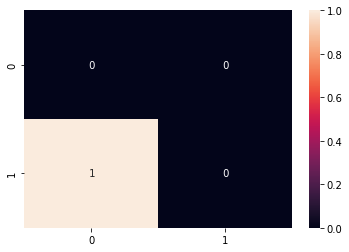

In [135]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import numpy as np
import itertools
import seaborn as sns

classifier=MultinomialNB()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True,fmt="2g")

In [ ]:
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
y_pred_train = classifier.predict(X_test)
print(classification_report(y_test , y_pred_train))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      2040
           1       0.92      0.82      0.87      1617

    accuracy                           0.89      3657
   macro avg       0.89      0.88      0.89      3657
weighted avg       0.89      0.89      0.89      3657

